In [34]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print (tf.__version__)

2.8.0


In [35]:
# import FASHION MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_img, train_lbl), (tst_img, tst_lbl) = fashion_mnist.load_data()

In [36]:
class_names = ['T-shirt', 'trouser', 'hoodie', 'dress', 'coat', 
               'sandal', 'shirt', 'sneaker', 'bag', 'hightop shoes']

In [37]:
# 60k training imgs in the training set with each img represented as 28x28pix
train_img.shape

(60000, 28, 28)

In [38]:
# 60k training lbls
len(train_lbl)

60000

In [39]:
train_lbl

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [40]:
tst_img.shape 

(10000, 28, 28)

In [41]:
len(tst_lbl)

10000

# Preprocess the data 

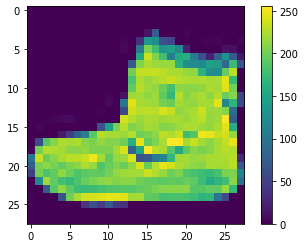

In [42]:
# the pix value goes form 0 to 255
plt.figure()
plt.imshow(train_img[0])
plt.colorbar()
plt.grid(False)
# plt.xlabel(class_names[train_lbl[0]])
plt.show()


In [43]:
# scaling values to range of 0 to 1. 
train_img = train_img / 255.0
tst_img = tst_img / 255.0

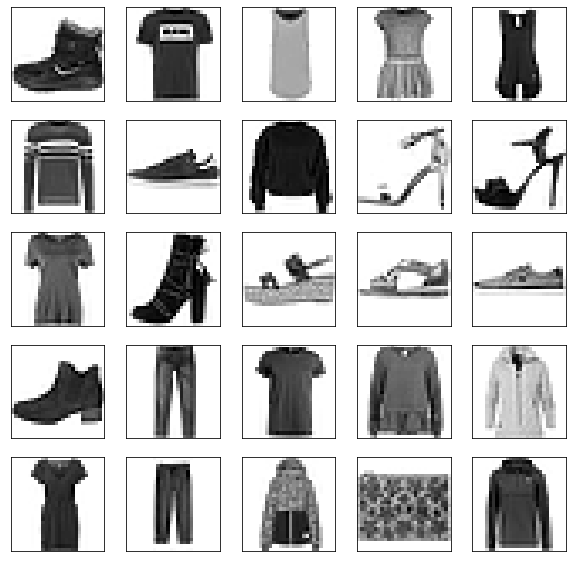

In [44]:
plt.figure(figsize = (10,10))
for i in range(25):
    ax = plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_lbl[i]])
    ax.xaxis.label.set_color('white')
plt.show()

# Build model
### layer setup

In [45]:
# 3 layers network model
model = tf.keras.Sequential([
    # first layer for flattening
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # 1 hidden layer
    tf.keras.layers.Dense(128, activation = 'relu'),
    # 1 output layer
    tf.keras.layers.Dense(10)
])

### model compiling

In [46]:
model.compile(
    # how the model is update based on the data it sees and its loss function
    optimizer = 'adam',
    # measures how accurate the model is in the training
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
    # monitors the training and testing step. 
    # uses accuracy, the fration of the img that are correctly classified
    metrics = ['accuracy']
)

### model training

In [47]:
#fitting the model to the training data
model.fit(train_img, train_lbl, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4938 - accuracy: 0.8265
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3735 - accuracy: 0.8649
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3334 - accuracy: 0.8785
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3115 - accuracy: 0.8847
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2918 - accuracy: 0.8928
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2772 - accuracy: 0.8973
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2670 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2567 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2463 - accuracy: 0.9069
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.237

In [48]:
tst_loss, tst_acc = model.evaluate(tst_img, tst_lbl, verbose = 2)
print('\nTest Acc: ', tst_acc)

313/313 - 0s - loss: 0.3440 - accuracy: 0.8810 - 356ms/epoch - 1ms/step

Test Acc:  0.8809999823570251


In [49]:
prob_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [50]:
pred = prob_model.predict(tst_img)

In [51]:
pred[0]

array([2.66611693e-08, 1.79045845e-08, 1.37673055e-08, 9.80230758e-11,
       4.63587426e-08, 3.79847805e-03, 2.34688898e-07, 2.72420904e-04,
       1.75036845e-07, 9.95928586e-01], dtype=float32)

In [52]:
np.argmax(pred[0])

9

In [53]:
tst_lbl[0]

9

In [54]:
def plt_img(i, pred_arr, tru_lbl, img):
    tru_lbl, img = tru_lbl[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap = plt.cm.binary)
    
    pred_lbl= np.argmax(pred_arr)
    if pred_lbl == tru_lbl: 
        color = 'green'
    else:
        color = 'red'
    
    plt.xlabel(
        "{} {:2.0f}% ({})".format(
            class_names[pred_lbl],
            100*np.max(pred_arr),
            class_names[tru_lbl]),
        color = color
    )


def plt_val_arr(i, pred_arr, tru_lbl):
    tru_lbl = tru_lbl[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplt = plt.bar(range(10),pred_arr, color = "#777777")
    plt.ylim([0,1])
    pred_lbl = np.argmax(pred_arr)
    
    thisplt[pred_lbl].set_color('red')
    thisplt[tru_lbl].set_color('green')
    

        

<function matplotlib.pyplot.show(close=None, block=None)>

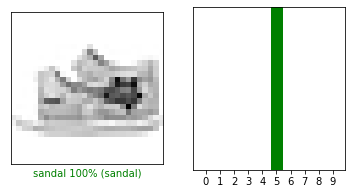

In [55]:
# for i in range(0,9):
i = 9999
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plt_img(i, pred[i], tst_lbl, tst_img)
plt.subplot(1,2,2)
plt_val_arr(i, pred[i], tst_lbl)
plt.show

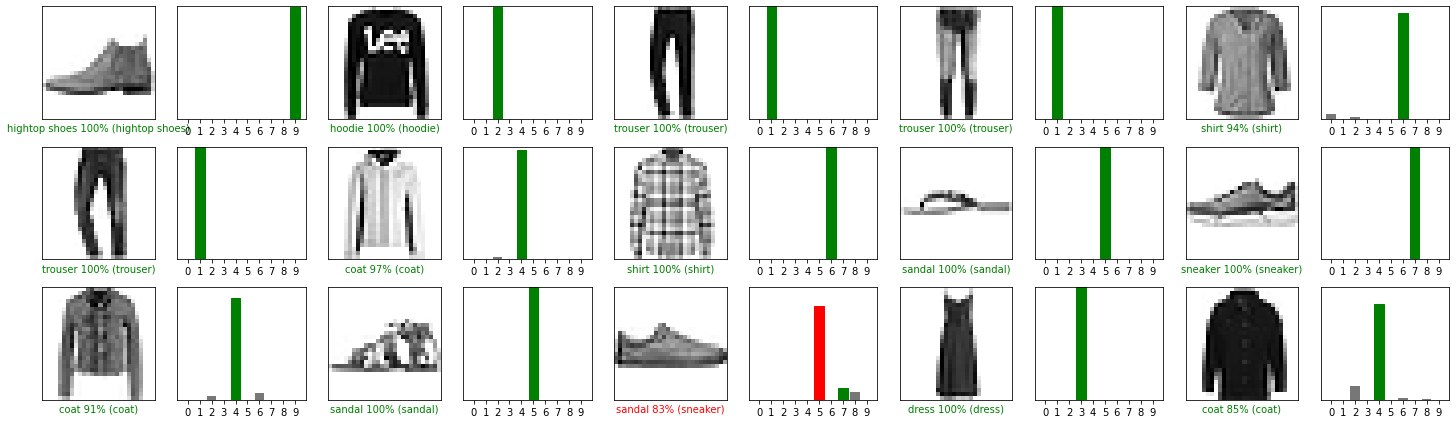

In [56]:
row = 3
col = 5
num_img = row * col
plt.figure(figsize = (2*2*col, 2*row))

for i in range(num_img):
    plt.subplot(row, 2*col, 2*i+1)
    plt_img(i, pred[i], tst_lbl, tst_img)
    plt.subplot(row, 2*col, 2*i+2)
    plt_val_arr(i, pred[i], tst_lbl)
plt.tight_layout()
plt.show()

In [57]:
img = tst_img[1]
print(img.shape)

(28, 28)


In [58]:
img = (np.expand_dims(img, 0))

print(img.shape)

(1, 28, 28)


In [59]:
pred_single = prob_model.predict(img)

print(pred_single)

[[8.1487324e-06 1.8267209e-16 9.9746192e-01 3.2691880e-10 5.9224461e-04
  1.1785227e-12 1.9377144e-03 2.5776636e-15 2.5340166e-10 1.9344532e-13]]


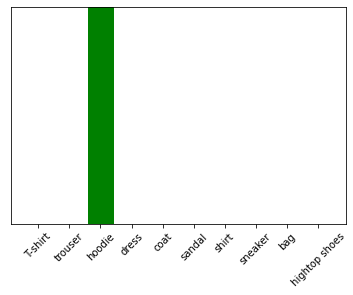

In [60]:
plt_val_arr(1, pred_single[0], tst_lbl) 
_ = plt.xticks(range(10), class_names, rotation=45)

plt.show()

In [61]:
np.argmax(pred_single[0])

2